<a href="https://colab.research.google.com/github/GouthamKumar-R/Colab/blob/main/EDA_attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

## Overview 

Attrition, refers to the phenomenon of the employees leaving the company. Employee attrition is always the focus of Human Resource Management. This project aims to predict factors affecting employee attrition.

Dataset :https://raw.githubusercontent.com/GouthamKumar-R/ML/master/D20%20-%20IML/Assignments/EDA%20%2B%20DV/attrition.csv

Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



Importing Files to Colab

In [3]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving attrition.csv to attrition.csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['attrition.csv']))

In [5]:
df.head()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0,3
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2,2


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.0,0.0,0.0,1.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.0,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.0,40.0
WorkLifeBalance,1470.0,2.761224,0.706476,1.0,2.0,3.0,3.0,4.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.0,5.0,9.0,40.0


In [7]:
df.shape

(1470, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   int64 
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   EducationField           1470 non-null   object
 5   EnvironmentSatisfaction  1470 non-null   int64 
 6   Gender                   1470 non-null   object
 7   JobInvolvement           1470 non-null   int64 
 8   JobLevel                 1470 non-null   int64 
 9   JobSatisfaction          1470 non-null   int64 
 10  MaritalStatus            1470 non-null   object
 11  MonthlyIncome            1470 non-null   int64 
 12  OverTime                 1470 non-null   object
 13  TotalWorkingYears        1470 non-null   int64 
 14  WorkLifeBalance          1470 non-null  

From the above result, we can infer that there are no NULL values

In [9]:
allcolumns = df.columns.tolist()
allcolumns

['Age',
 'Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'OverTime',
 'TotalWorkingYears',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'DistanceFromHome']

Splitting **Categorical** and **Numerical** features

In [10]:
df_cat = df[['Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MaritalStatus', 'OverTime',
        'WorkLifeBalance']]
df_cat.tail()

,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,OverTime,WorkLifeBalance
1465,0,Travel_Frequently,Research & Development,Medical,3,Male,4,2,4,Married,No,3
1466,0,Travel_Rarely,Research & Development,Medical,4,Male,2,3,1,Married,No,3
1467,0,Travel_Rarely,Research & Development,Life Sciences,2,Male,4,2,2,Married,Yes,3
1468,0,Travel_Frequently,Sales,Medical,4,Male,2,2,2,Married,No,2
1469,0,Travel_Rarely,Research & Development,Medical,2,Male,4,2,3,Married,No,4


In [11]:
df_num = df[['Age','Attrition','MonthlyIncome','TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'DistanceFromHome' ]]
df_num.head()

,Age,Attrition,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,5993,8,6,4,0,5,1
1,49,0,5130,10,10,7,1,7,8
2,37,1,2090,7,0,0,0,0,2
3,33,0,2909,8,8,7,3,0,3
4,27,0,3468,6,2,2,2,2,2


Univaritate Analysis:

Graphs for Attrition:
Total_no. of categories:2


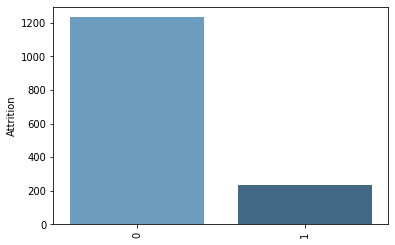

Graphs for BusinessTravel:
Total_no. of categories:3


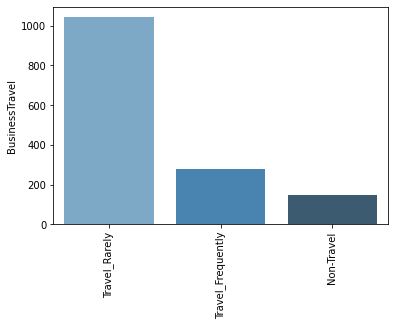

Graphs for Department:
Total_no. of categories:3


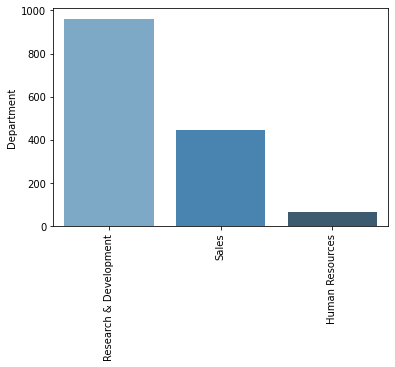

Graphs for EducationField:
Total_no. of categories:6


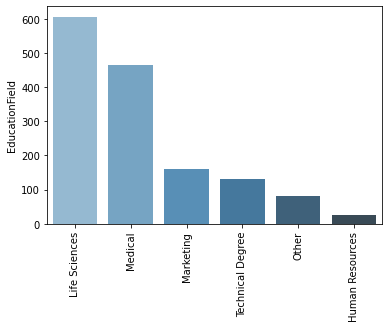

Graphs for EnvironmentSatisfaction:
Total_no. of categories:4


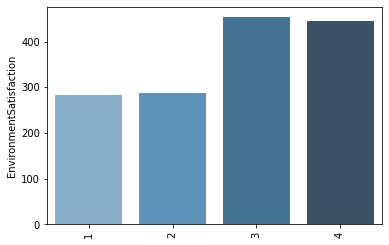

Graphs for Gender:
Total_no. of categories:2


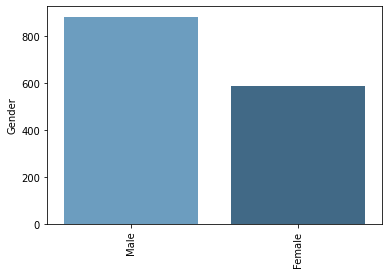

Graphs for JobInvolvement:
Total_no. of categories:4


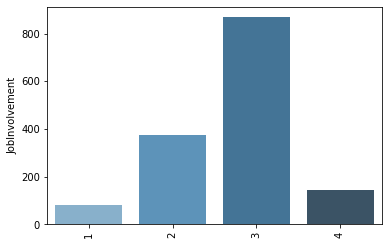

Graphs for JobLevel:
Total_no. of categories:5


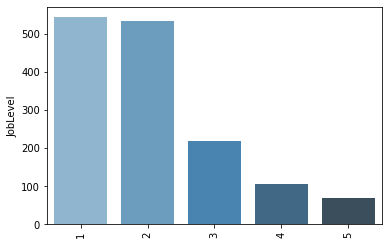

Graphs for JobSatisfaction:
Total_no. of categories:4


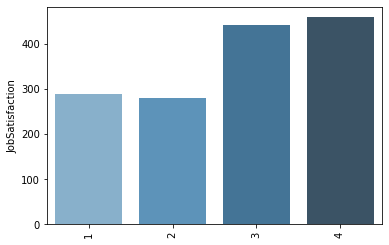

Graphs for MaritalStatus:
Total_no. of categories:3


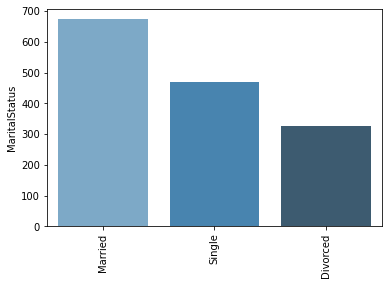

Graphs for OverTime:
Total_no. of categories:2


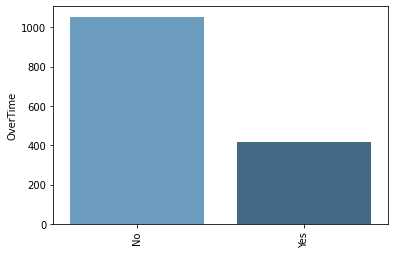

Graphs for WorkLifeBalance:
Total_no. of categories:4


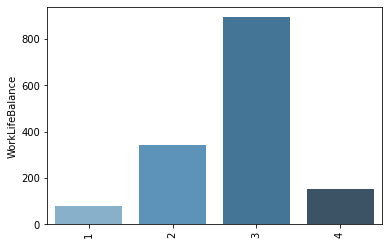

In [14]:
#Categorical variables: count, count distinct, Unique values

for i in df_cat:
    cat_num = df_cat[i].value_counts()
    print("Graphs for %s:\nTotal_no. of categories:%d" %(i, len(cat_num)))
    chart = sns.barplot(x= cat_num.index, y= cat_num, palette="Blues_d")
    chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
    plt.show()

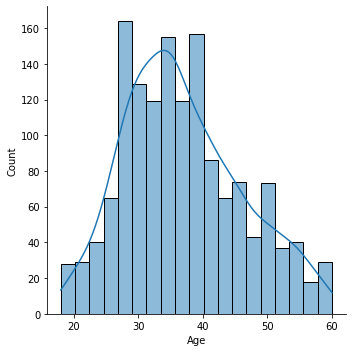

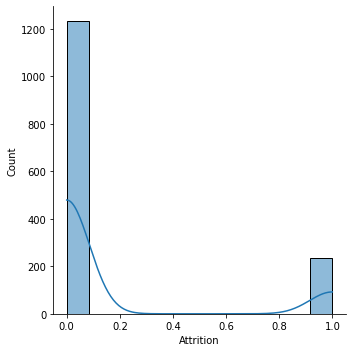

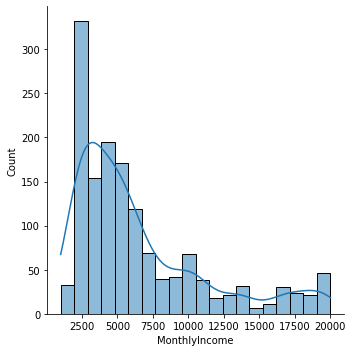

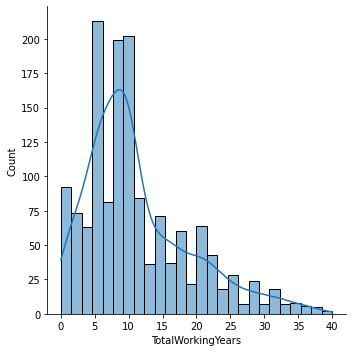

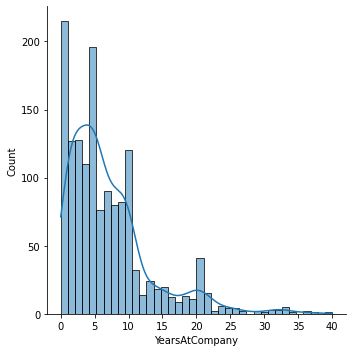

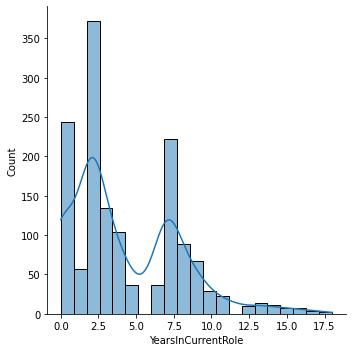

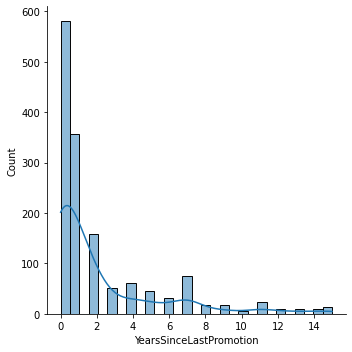

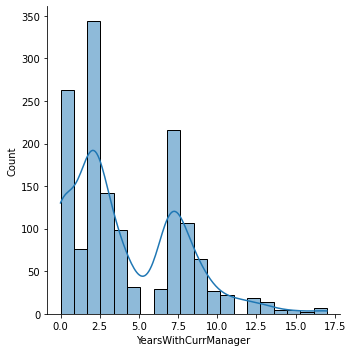

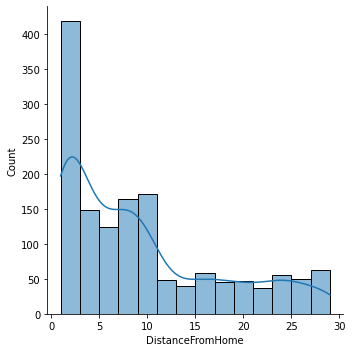

In [15]:
#Numerical: count, min, max
for i in df_num:
  sns.displot(df_num, x=i, kde=True)
  plt.show()